# Importing Libraries

In [1]:
import pandas as pd

#Linear Algebra
import numpy as np

#Data Visualization
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

#Algorithms
from sklearn.svm import SVC, LinearSVC
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn import metrics  
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder


import warnings
warnings.filterwarnings('ignore')

# Getting Data

In [2]:
adds=pd.read_csv('saleschannel.csv')
adds.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
adds.shape

(200, 5)

There is 200 rows and 5 columns present in this dataset.

# summary statistics

In [4]:
adds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
radio         200 non-null float64
newspaper     200 non-null float64
sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


other than unnamed all others  features are floating values

In [5]:
adds.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
adds.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

# Data_Cleansing

There is no use of Unnamed column ,so it's better to drop this column.

In [7]:
adds.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
adds.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


now you can column had been dropped

In [9]:
adds.columns=['TV','Radio','Newspaper','Sales']

In [10]:
adds.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


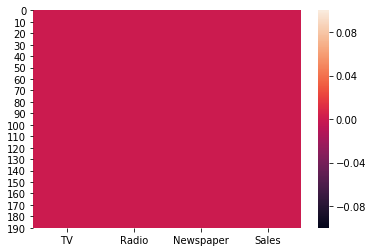

In [11]:
#check weather any null values present or not
sns.heatmap(adds.isnull())

It's clear that there is no null data is present in this dataset 

# Exploratory Data Analysis

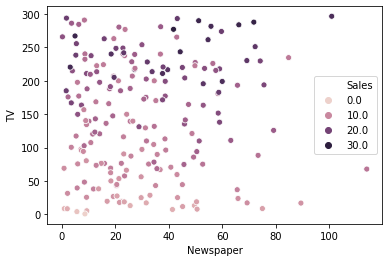

In [12]:
sns.scatterplot(x='Newspaper',y='TV',hue='Sales',data =adds)

While in TV in the range 200-300 and in Newspaper is in range 20-60 sales is high.

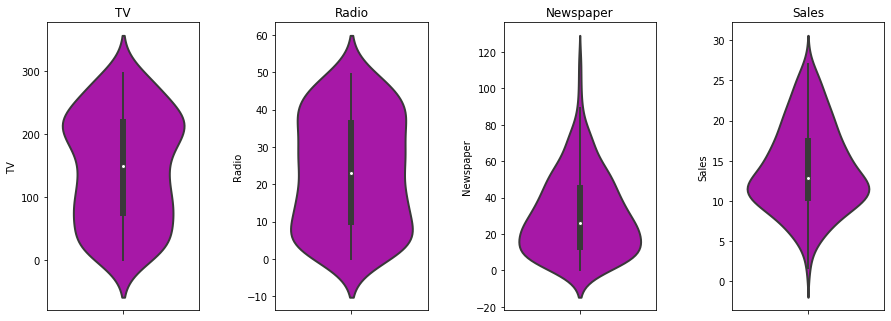

In [13]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('TV')
sns.violinplot(y='TV',data=adds,color='m',linewidth=2)
plt.subplot(142)
plt.title('Radio')
sns.violinplot(y='Radio',data=adds,color='m',linewidth=2)
plt.subplot(143)
plt.title('Newspaper')
sns.violinplot(y='Newspaper',data=adds,color='m',linewidth=2)
plt.subplot(144)
plt.title('Sales')
sns.violinplot(y='Sales',data=adds,color='m',linewidth=2)


advertisement range in all places is in 0-15 at these time sales is good .

Text(0.5, 0, 'TV')

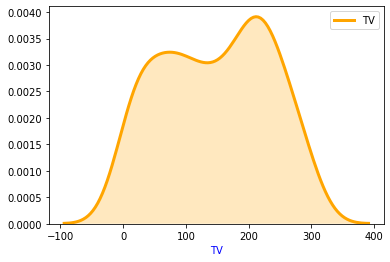

In [14]:
sns.kdeplot(adds['TV'],shade=True,c='orange',linewidth=3)
plt.xlabel("TV",c="blue")

Sales is more while Advertisements through TV in the range of 250-300.

Text(0.5, 0, 'Radio')

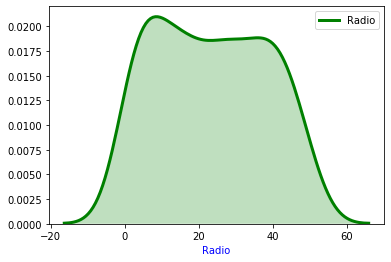

In [15]:
sns.kdeplot(adds['Radio'],shade=True,c='green',linewidth=3)
plt.xlabel("Radio",c="Blue")

Sales is good while advertisement through radio in 10-20 .

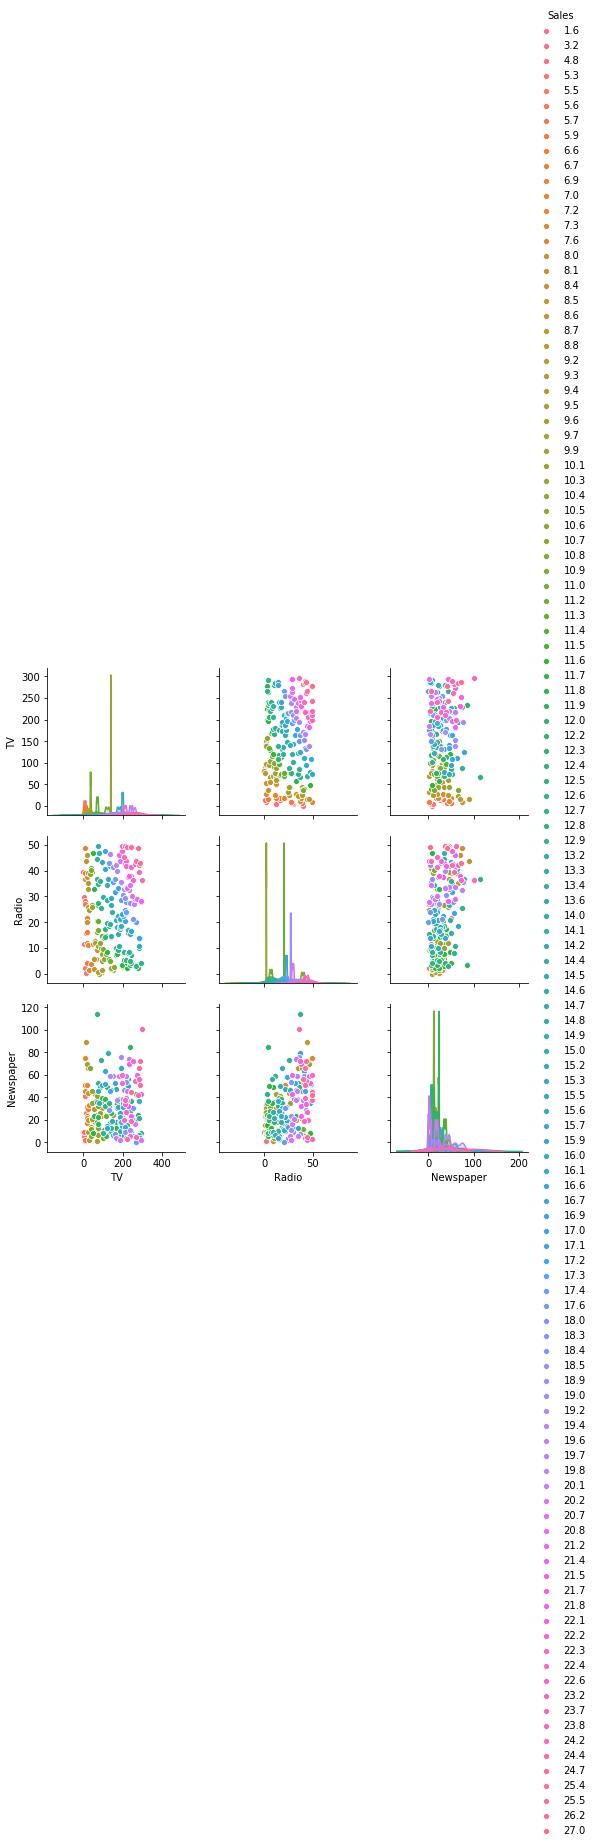

In [16]:
sns.pairplot(adds ,hue ='Sales', vars =['TV', 'Radio', 'Newspaper'])

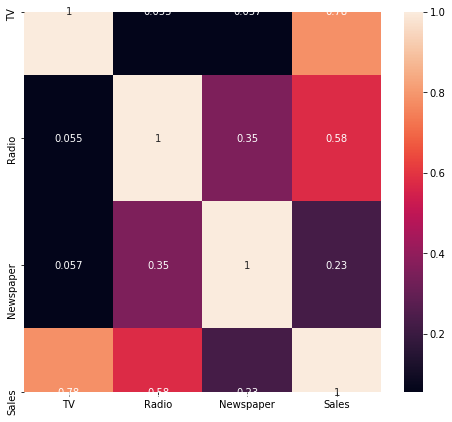

In [17]:
#Check cor-relation
corr_hmap=adds.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)

Cor-relation of TV with all other attributes is not quite goodand it's completely highly negatively cor-relate with all toher attributes other than sales.

# Detecting and Removal of Outliers

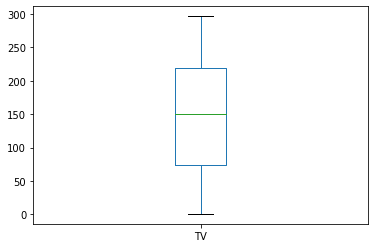

In [18]:
adds['TV'].plot.box()

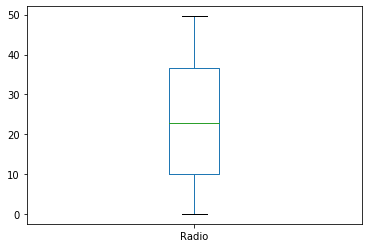

In [19]:
adds['Radio'].plot.box()

TV              AxesSubplot(0.125,0.536818;0.065678x0.343182)
Radio        AxesSubplot(0.203814,0.536818;0.065678x0.343182)
Newspaper    AxesSubplot(0.282627,0.536818;0.065678x0.343182)
Sales        AxesSubplot(0.361441,0.536818;0.065678x0.343182)
dtype: object

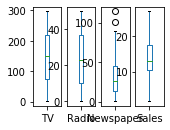

In [20]:
adds.plot(kind='box',subplots=True,layout=(2,10))

only news paper contains outliers and it's better to remove those outliers

In [21]:
#removal of outleirs
#Removing Outliers
from scipy.stats import zscore
z=np.abs(zscore(adds))
z

array([[9.69852266e-01, 9.81522472e-01, 1.77894547e+00, 1.55205313e+00],
       [1.19737623e+00, 1.08280781e+00, 6.69578760e-01, 6.96046111e-01],
       [1.51615499e+00, 1.52846331e+00, 1.78354865e+00, 9.07405869e-01],
       [5.20496822e-02, 1.21785493e+00, 1.28640506e+00, 8.60330287e-01],
       [3.94182198e-01, 8.41613655e-01, 1.28180188e+00, 2.15683025e-01],
       [1.61540845e+00, 1.73103399e+00, 2.04592999e+00, 1.31091086e+00],
       [1.04557682e+00, 6.43904671e-01, 3.24708413e-01, 4.27042783e-01],
       [3.13436589e-01, 2.47406325e-01, 8.72486994e-01, 1.58039455e-01],
       [1.61657614e+00, 1.42906863e+00, 1.36042422e+00, 1.77205942e+00],
       [6.16042873e-01, 1.39530685e+00, 4.30581584e-01, 6.57617064e-01],
       [9.45155670e-01, 1.17923146e+00, 2.92486143e-01, 1.04190753e+00],
       [7.90028350e-01, 4.96973404e-02, 1.22232878e+00, 6.48970529e-01],
       [1.43908760e+00, 7.99208859e-01, 1.62704048e+00, 9.26620392e-01],
       [5.78501712e-01, 1.05768905e+00, 1.07502697e

In [22]:
threshold=3
np.where((z>3))

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))

In [23]:
adds_new=adds[(z<3).all(axis=1)]#removing outliers

In [24]:
adds_new.shape

(198, 4)

In [25]:
adds.shape

(200, 4)

only 2 rows had been removed as an outliers.

# Check Distribution of skewness

In [26]:
adds_new.skew()

TV          -0.082332
Radio        0.114842
Newspaper    0.650112
Sales        0.407130
dtype: float64

Newspaper has skewness it's better to reove this skewness.

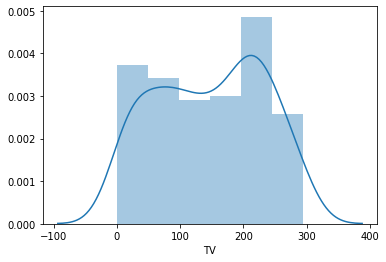

In [27]:
sns.distplot(adds_new['TV'])

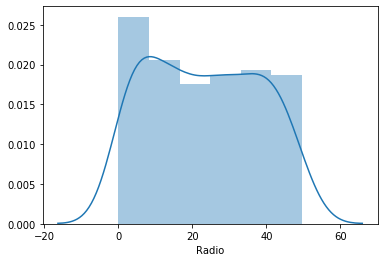

In [28]:
sns.distplot(adds['Radio'])

In [29]:
collist=adds_new.columns
ncol=4
nrows=2


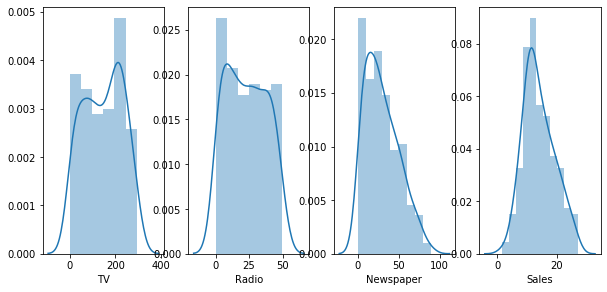

In [30]:
plt.figure(figsize=(10,10))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(adds_new[collist[i]])

In [31]:
x=adds_new.iloc[:,:-1]
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [32]:
y=adds_new.iloc[:,-1]
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [33]:
for col in x.columns:
    if x.skew().loc[col]>0.55:
        x[col]=np.log1p(x[col])

In [34]:
x.skew()

TV          -0.082332
Radio        0.114842
Newspaper   -0.839481
dtype: float64

now it's perfect.

# Building  Machine Learning Model

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=88)

In [36]:
x_train.shape

(138, 3)

In [37]:
y_train.shape

(138,)

In [38]:
y_test.shape

(60,)

In [39]:
x_test.shape

(60, 3)

In [40]:
#Applying Standard Scaling to get optimized result
sc=StandardScaler()

In [41]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [42]:
lr=LinearRegression()
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor()

In [43]:
#prepare models
models=[]
models.append(('LinearRegression',lr))
models.append(('DecisionTreeRegressor',dtr))
models.append(('RandomForestRegressor',rfr))
#evaluate each model
Model=[]
Score=[]
MAE=[]
MSE=[]
RMSE=[]
for name,model in models:
    print('***********************',name,'************')
    Model.append(name)
    print('\n')
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    sr=model.score(x_train,y_train)
    print('score',sr)
    Score.append(sr*100)
    print('\n')
    print('Performance Measures:')
    mae=metrics.mean_absolute_error(y_test, pred)
    print('MAE',mae)
    MAE.append(mae)
    mse=metrics.mean_squared_error(y_test, pred)
    print('MSE',mse)
    MSE.append(mse)
    rmse=np.sqrt(metrics.mean_squared_error(y_test, pred))
    print('RMSE',rmse)
    RMSE.append(rmse)

*********************** LinearRegression ************


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


score 0.8897097091308095


Performance Measures:
MAE 1.1697030276919542
MSE 2.36209164079725
RMSE 1.5369097698945275
*********************** DecisionTreeRegressor ************


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')


score 1.0


Performance Measures:
MAE 0.8883333333333333
MSE 1.3988333333333332
RMSE 1.182722847218795
*********************** RandomForestRegressor ************


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_

In [44]:
result=pd.DataFrame({'models':Model,'score':Score,'MAE':MAE,'MSE':MSE,'RMSE':RMSE},columns=['models','score','MAE','MSE','RMSE'])
result

,models,score,MAE,MSE,RMSE
0,LinearRegression,88.970971,1.169703,2.362092,1.536910
1,DecisionTreeRegressor,100.000000,0.888333,1.398833,1.182723
2,RandomForestRegressor,99.446970,0.592833,0.500832,0.707695


Well as we can see above in terms of mean Mean-square-error and mean-absolute-error ,root-mean-square-error RandomForestRegressor is best model for this.

In [45]:
pred_rfr=rfr.predict(x_test)
print("predicted wins",pred_rfr)
print("actual wins",y_test)

predicted wins [13.3   8.97  6.92 10.52 15.91  8.19 11.43  9.11 11.54 10.87  9.53 23.33
 11.68 17.97 16.47  6.66 18.28  9.52 13.26 14.93 20.16 19.88 20.2  10.43
 12.67 18.51 10.95 11.51 11.01 22.14 16.04 15.33  5.42 12.16 11.69 17.68
  9.87 12.65 20.34 25.21 13.52 19.21 14.34  7.25  8.88  5.35 23.71  9.13
 20.01 12.85 14.64 14.81  9.61 11.77 22.52 10.4  20.55  9.91 23.77 11.96]
actual wins 199    13.4
2       9.3
158     7.3
13      9.7
40     16.6
166     8.0
131    12.7
75      8.7
86     12.0
180    10.5
34      9.5
58     23.8
88     12.9
70     18.3
113    15.9
22      5.6
153    19.0
107     8.7
115    12.6
97     15.5
54     20.2
92     19.4
176    20.2
46     10.6
31     11.9
14     19.0
80     11.8
96     11.7
122    11.6
53     21.2
168    17.1
23     15.5
132     5.7
190    10.8
25     12.0
64     18.0
65      9.3
43     12.9
142    20.1
61     24.2
102    14.8
20     18.0
160    14.4
172     7.6
60      8.1
8       4.8
15     22.4
195     7.6
137    20.8
164    11.9
77     

# Saving_Model

In [46]:
adds_new=pd.DataFrame(pred_rfr)
adds_new.to_csv('RNDOMFORESTRERESSOR_adds.csv')

In [47]:
from sklearn.externals import joblib
#save the model as a pickle in a file
joblib.dump(rfr,'adds.obj')
#load the model from a file
dct_from_joblib=joblib.load('adds.obj')
#use the loaded model to make prediction
dct_from_joblib.predict(x_test)

array([13.3 ,  8.97,  6.92, 10.52, 15.91,  8.19, 11.43,  9.11, 11.54,
       10.87,  9.53, 23.33, 11.68, 17.97, 16.47,  6.66, 18.28,  9.52,
       13.26, 14.93, 20.16, 19.88, 20.2 , 10.43, 12.67, 18.51, 10.95,
       11.51, 11.01, 22.14, 16.04, 15.33,  5.42, 12.16, 11.69, 17.68,
        9.87, 12.65, 20.34, 25.21, 13.52, 19.21, 14.34,  7.25,  8.88,
        5.35, 23.71,  9.13, 20.01, 12.85, 14.64, 14.81,  9.61, 11.77,
       22.52, 10.4 , 20.55,  9.91, 23.77, 11.96])

Upto now model building and model selection had been done.